In [1]:
import numpy as np
from pyscf import gto, scf
import pyscf.cc
import numpy as np
import pyscf.qmmm
angstrom = 1 / 0.52917721067

In [2]:
Energy_Benzene=-231.7425726453491
Energy_Pyridine=-247.761849080993
Energy_Pyrimidine=-263.7827135573776
Energy_Triazine=-279.80511862026054
Energy_Pyridine_b=-247.70676381635442
Energy_Pyrimidine_b=-263.67234456355345
Energy_Triazine_b=-279.639214010391

In [3]:
print((Energy_Pyridine_b-Energy_Pyridine)*1000,(Energy_Pyrimidine_b-Energy_Pyrimidine)*1000,(Energy_Triazine_b-Energy_Triazine)*1000 )

55.08526463856356 110.36899382412457 165.90460986952849


In [4]:
dV1=np.load('dV1.npy')
dV2=np.load('dV2.npy')
dV3=np.load('dV3.npy')

In [5]:
dm12mm=np.load("dm12mm.npy")
dm12pp=np.load("dm12pp.npy")
dm1m=np.load("dm1m.npy")
dm1p=np.load("dm1p.npy")
dmBenz=np.load("dmBenz.npy")

V nuc nuc 

In [6]:
benz_atom="""C 0.0 2.6196127020137916 0.0;
H 0.0 4.652157753665769 0.0;
C 2.268651148020338 1.309806351006896 0.0;
H 4.028886797087305 2.326078876832885 0.0;
C 2.2686511480203384 -1.3098063510068951 0.0;
H 4.028886797087305 -2.3260788768328835 0.0;
C 3.208100310526939e-16 -2.6196127020137916 0.0;
H 5.697250102155325e-16 -4.652157753665769 0.0;
C -2.2686511480203375 -1.309806351006897 0.0;
H -4.028886797087303 -2.3260788768328866 0.0;
C -2.2686511480203393 1.309806351006894 0.0;
H -4.028886797087306 2.3260788768328813 0.0
"""

mol = gto.M(atom=benz_atom, basis='def2-TZVP',unit='au')
b_nn= (mol.energy_nuc())
p1_nn=(mol.energy_nuc([7,0,6,1,6,1,6,1,6,1,6,1]))
p2_nn=(mol.energy_nuc([7,0,6,1,7,0,6,1,6,1,6,1]))
p3_nn=(mol.energy_nuc([7,0,6,1,7,0,6,1,7,0,6,1]))

Pyridine Prediction

In [7]:
p1_d0=np.einsum('ij,ji',dmBenz,dV1)
p1_d1=np.einsum('ij,ji',dm1p-dm1m,dV1)/.1/2
p1_d2=np.einsum('ij,ji',dm1p-2*dmBenz+dm1m,dV1)/(.05**2)/6

print('Predicted = ',Energy_Benzene+p1_d0+p1_d1+p1_d2 +p1_nn-b_nn, ' ///  true _BBS = ',Energy_Pyridine_b, ' ///  true  = ',Energy_Pyridine)
print(Energy_Benzene,p1_d0,p1_d1,p1_d2)

Predicted =  -247.71548886494048  ///  true _BBS =  -247.70676381635442  ///  true  =  -247.761849080993
-231.7425726453491 -14.059558753257999 -1.9378992293532227 0.12206279419629039


In [8]:
715.49-761.84

-46.35000000000002

Pyrimidine prediction <br>
$$f_{xy}(x,y)\approx {\frac {f(x+h,y+k)-f(x+h,y)-f(x,y+k)+2f(x,y)-f(x-h,y)-f(x,y-k)+f(x-h,y-k)}{2hk}}$$

In [9]:
p2_d0=np.einsum('ij,ji',dmBenz,dV2)
p2_d1=np.einsum('ij,ji',dm1p-dm1m,dV2)/.1/2*2
p2_d2=np.einsum('ij,ji',dm1p-2*dmBenz+dm1m,dV2)/(.05**2)/6*2
p2_d2+=np.einsum('ij,ji',dm12pp-2*dm1p-2*dm1m+2*dmBenz+dm12mm,dV2)/(.05**2)/2/6*2

print('Predicted = ',Energy_Benzene+p2_d0+p2_d1+p2_d2 +p2_nn-b_nn, ' ///  true  = ',Energy_Pyrimidine_b, ' ///  true  = ',Energy_Pyrimidine)
print(Energy_Benzene,p2_d0,p2_d1,p2_d2)

Predicted =  -263.6903287642914  ///  true  =  -263.67234456355345  ///  true  =  -263.7827135573776
-231.7425726453491 -28.11911750651597 -3.910004770722951 0.24543735965143335


Triazine Prediction 

In [10]:
p3_d0=np.einsum('ij,ji',dmBenz,dV3)
p3_d1=np.einsum('ij,ji',dm1p-dm1m,dV3)/.1/2*3
p3_d2=np.einsum('ij,ji',dm1p-2*dmBenz+dm1m,dV3)/(.05**2)/6*3
p3_d2+=np.einsum('ij,ji',dm12pp-2*dm1p-2*dm1m+2*dmBenz+dm12mm,dV3)/(.05**2)/2/6*2*3

print('Predicted = ',Energy_Benzene+p3_d0+p3_d1+p3_d2 +p3_nn-b_nn, ' ///  true_b  = ',Energy_Triazine_b , ' ///  true  = ',Energy_Triazine )
print(Energy_Benzene,p3_d0,p3_d1,p3_d2)

Predicted =  -279.6669568658532  ///  true_b  =  -279.639214010391  ///  true  =  -279.80511862026054
-231.7425726453491 -42.17867625977398 -5.9163166241090925 0.3702591739141132


In [11]:
E_N_CH= -54.46590003755885
E_N=-54.53153934411181
correct=E_N-E_N_CH
correct*3

-0.19691791965887973

In [12]:
print('Predicted = ',Energy_Benzene+p1_d0+p1_d1+p1_d2 +p1_nn-b_nn+correct,  ' ///  true  = ',Energy_Pyridine)
print('Predicted = ',Energy_Benzene+p2_d0+p2_d1+p2_d2 +p2_nn-b_nn+correct*2,  ' ///  true  = ',Energy_Pyrimidine)
print('Predicted = ',Energy_Benzene+p3_d0+p3_d1+p3_d2 +p3_nn-b_nn+correct*3, ' ///  true  = ',Energy_Triazine )

print("######  without correct ########")
print('Predicted = ',Energy_Benzene+p1_d0+p1_d1+p1_d2 +p1_nn-b_nn, ' ///  true  = ',Energy_Pyridine)
print('Predicted = ',Energy_Benzene+p2_d0+p2_d1+p2_d2 +p2_nn-b_nn,  ' ///  true  = ',Energy_Pyrimidine)
print('Predicted = ',Energy_Benzene+p3_d0+p3_d1+p3_d2 +p3_nn-b_nn, ' ///  true  = ',Energy_Triazine )


Predicted =  -247.78112817149344  ///  true  =  -247.761849080993
Predicted =  -263.8216073773973  ///  true  =  -263.7827135573776
Predicted =  -279.86387478551205  ///  true  =  -279.80511862026054
######  without correct ########
Predicted =  -247.71548886494048  ///  true  =  -247.761849080993
Predicted =  -263.6903287642914  ///  true  =  -263.7827135573776
Predicted =  -279.6669568658532  ///  true  =  -279.80511862026054


In [13]:
print('Predicted = ',Energy_Benzene+p1_d0+p1_d1+p1_d2 +p1_nn-b_nn+correct-Energy_Pyridine)
print('Predicted = ',Energy_Benzene+p2_d0+p2_d1+p2_d2 +p2_nn-b_nn+correct*2-Energy_Pyrimidine)
print('Predicted = ',Energy_Benzene+p3_d0+p3_d1+p3_d2 +p3_nn-b_nn+correct*3-Energy_Triazine )
print ("")
print('Predicted = ',Energy_Benzene+p1_d0+p1_d1+p1_d2 +p1_nn-b_nn-Energy_Pyridine)
print('Predicted = ',Energy_Benzene+p2_d0+p2_d1+p2_d2 +p2_nn-b_nn-Energy_Pyrimidine)
print('Predicted = ',Energy_Benzene+p3_d0+p3_d1+p3_d2 +p3_nn-b_nn-Energy_Triazine )


Predicted =  -0.019279090500447182
Predicted =  -0.03889382001972308
Predicted =  -0.058756165251509174

Predicted =  0.04636021605250562
Predicted =  0.09238479308618253
Predicted =  0.13816175440734924


In [18]:
p1epc=Energy_Benzene+p1_d0+p1_d1+p1_d2 +p1_nn-b_nn+correct 
p2epc=Energy_Benzene+p2_d0+p2_d1+p2_d2 +p2_nn-b_nn+correct*2
p3epc=Energy_Benzene+p3_d0+p3_d1+p3_d2 +p3_nn-b_nn+correct*3

p1ep=Energy_Benzene+p1_d0+p1_d1+p1_d2 +p1_nn-b_nn
p2ep=Energy_Benzene+p2_d0+p2_d1+p2_d2 +p2_nn-b_nn
p3ep=Energy_Benzene+p3_d0+p3_d1+p3_d2 +p3_nn-b_nn 

In [15]:
print(p1epc/p1ep+1)
print(p2epc/p2ep+1)
print(p3epc/p3ep+1)

0.5841458012488013
0.5790019253120976
0.5747291607323151


In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.lines as lines

Text(0.5, 0, '[]')

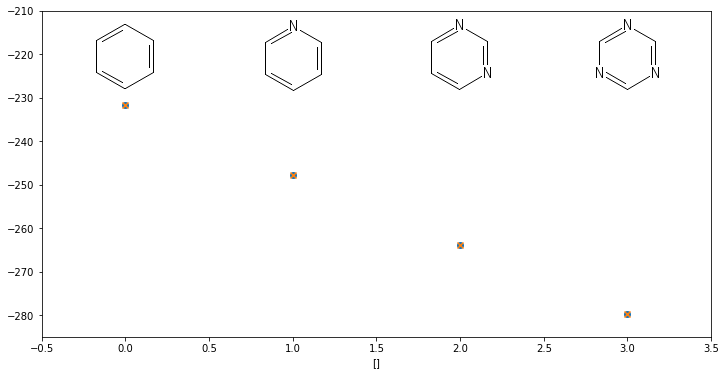

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
plt.xlabels=[]
plt.scatter([0,1,2,3],[Energy_Benzene,p1epc,p2epc,p3epc],marker='o')
plt.scatter([0,1,2,3],[Energy_Benzene,Energy_Pyridine,Energy_Pyrimidine,Energy_Triazine],marker='x')

benzfig=image.imread('./benz.png', format='png')
p1fig=image.imread('./p1.png', format='png')
p2fig=image.imread('./p2.png', format='png')
p3fig=image.imread('./p3.png', format='png')

imagebox = OffsetImage(benzfig, zoom=1.)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [-0.125,-225],xybox=(20., 20.),xycoords='data',
                    frameon=False,boxcoords="offset points",pad=0.)
ax.add_artist(ab)

imagebox = OffsetImage(p1fig, zoom=1.)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [0.875,-225],xybox=(20., 20.),xycoords='data',
                    frameon=False,boxcoords="offset points",pad=0.)
ax.add_artist(ab)

imagebox = OffsetImage(p2fig, zoom=1.)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [1.875,-225],xybox=(20., 20.),xycoords='data',
                    frameon=False,boxcoords="offset points",pad=0.)
ax.add_artist(ab)

imagebox = OffsetImage(p3fig, zoom=1.)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [2.875,-225],xybox=(20., 20.),xycoords='data',
                    frameon=False,boxcoords="offset points",pad=0.)

ax.add_artist(ab)
plt.xlim(-0.5,3.5)
plt.ylim(-285,-210)
plt.xlabel([])
#plt.savefig('benz_pyr.png',bbox='tight')

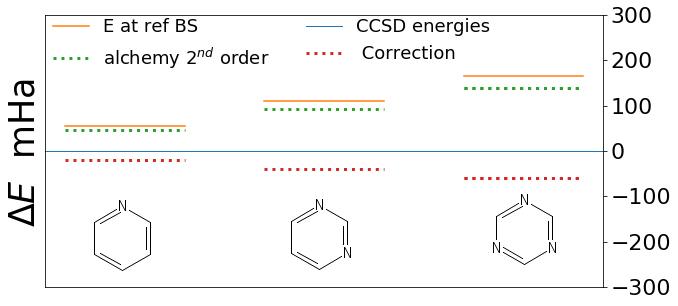

In [162]:
fig, ax = plt.subplots(figsize=(10,5))

peec=[p1epc,p2epc,p3epc]
pee=[p1ep,p2ep,p3ep]
true_en=[Energy_Benzene,Energy_Pyridine,Energy_Pyrimidine,Energy_Triazine]
en_benzbs=[Energy_Pyridine_b,Energy_Pyrimidine_b,Energy_Triazine_b]


for i in range(2):
    ax.plot([i+.7,i+1.3],1000*np.asarray([en_benzbs[i]-true_en[i+1],en_benzbs[i]-true_en[i+1]]),color ='C1',ls='-')
for i in range(3):
    ax.plot([i+.7,i+1.3],1000*np.asarray([pee[i]-true_en[i+1],pee[i]-true_en[i+1]]),color ='C2',ls=':',lw=3.)
for i in range(3):
    ax.plot([i+.7,i+1.3],1000*np.asarray([peec[i]-true_en[i+1],peec[i]-true_en[i+1]]),color ='C3',ls=':',lw=3.)

ax.plot([2+.7,2+1.3],1000*np.asarray([en_benzbs[2]-true_en[2+1],en_benzbs[2]-true_en[2+1]]),color ='C1',ls='-',\
                                                             label="E at ref BS")
ax.plot([2+.7,2+1.3],1000*np.asarray([pee[2]-true_en[2+1],pee[2]-true_en[2+1]]),color ='C2',ls=':',lw=3.,label="alchemy $2^{nd}$ order")
ax.plot([.6,3.4],[0,0],color ='C0',ls='-',label="CCSD energies",lw=1.)
ax.plot([2+.7,2+1.3],1000*np.asarray([peec[2]-true_en[2+1],peec[2]-true_en[2+1]]),color ='C3',ls=':',lw=3.,label=" Correction")


imagebox = OffsetImage(p1fig, zoom=1.)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [0.875,-230],xybox=(20., 20.),xycoords='data',
                    frameon=False,boxcoords="offset points",pad=0.)
ax.add_artist(ab)

imagebox = OffsetImage(p2fig, zoom=1.)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [1.875,-230],xybox=(20., 20.),xycoords='data',
                    frameon=False,boxcoords="offset points",pad=0.)
ax.add_artist(ab)

imagebox = OffsetImage(p3fig, zoom=1.)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [2.875,-230],xybox=(25., 25.),xycoords='data',
                    frameon=False,boxcoords="offset points",pad=0.)

ax.add_artist(ab)
ax.set_xticks([])
ax.yaxis.tick_right()
ax.tick_params(axis="y",labelsize=22)
plt.ylim(-300,300)
plt.xlim(.6,3.4)
plt.legend(fontsize=18,loc=(0.001,0.77),frameon=False,ncol=2)

ax.set_ylabel( r"$\Delta E$  mHa ", fontsize=35)
plt.savefig('benz_pyr.pdf',bbox='tight',dpi=500)
